In [16]:
import pandas as pd
import os
import fnmatch

import numpy as np

from scipy.stats import ttest_ind

import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\Heparin counts TSC surface levels\\20180515 HD0006\\Exported data\\export_TSC_FITC - IgG1_003.csv"

In [3]:
root_path = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\Heparin counts TSC surface levels\\"

In [4]:
surface_level_files = {
    'APC ADAM10':'export_PRP_AF488 1G5 + APC ADAM10.csv', 
    'DY594 RCA':'export_PRP_Dy594 RCA1.csv', 
    'PE IgG':'export_PRP_PE IgG.csv', 
    'FITC IgG1':'export_PRP_FITC IgG1.csv', 
    'PE CD9':'export_PRP_PE CD9.csv', 
    'AF488 IgG':'export_PRP_AF488 IgG.csv', 
    'PE IgG1':'export_PRP_PE IgG1.csv', 
    'PE CD41':'export_PRP_PE CD41.csv', 
    'APC IgG2b':'export_PRP_APC IgG2b.csv', 
    'FITC RCA1':'export_PRP_FITC RCA1.csv', 
    'FITC AK2':'export_PRP_FITC AK2.csv', 
    'Unstained':'export_PRP_Unstained.csv'
}

measured_bands = {'APC ADAM10':['APC-A', 'FITC-A'], 
    'DY594 RCA':['PE-Texas Red-A'], 
    'PE IgG':['PE-A'], 
    'FITC IgG1':['FITC-A'], 
    'PE CD9':['PE-A'], 
    'AF488 IgG':['FITC-A','Alexa Fluor 488-A'], 
    'PE IgG1':['PE-A'], 
    'PE CD41':['PE-A'], 
    'APC IgG2b':['APC-A'], 
    'FITC RCA1':['FITC-A','Alexa Fluor 488-A'], 
    'FITC AK2':['FITC-A','Alexa Fluor 488-A'],
    'Unstained':['PE-Texas Red-A','APC-A','FITC-A','PE-A'],
}

measured_surface_markers = {'ADAM10':'APC ADAM10',
                            'AK2':'FITC AK2',
                            'CD9':'PE CD9',
                            'CD41':'PE CD41',
                            'RCA - FITC':'FITC RCA1',
                            'RCA - Texas red':'DY594 RCA'}

In [5]:
for donor in os.listdir(root_path):
    sm_values = {}

    for surface_marker in measured_surface_markers.keys():
        file = surface_level_files[measured_surface_markers[surface_marker]]
        
        sm_values[surface_marker] = file
        
        donor_path = f'{root_path}\\{donor}\\new data\\{file}'
        
        db = pd.DataFrame.from_csv(donor_path)
        
        means = db.mean()
    
        

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # This is added back by InteractiveShellApp.init_path()


## T-Score

In [20]:
def t_score(donor_a, donor_b, marker):
    file = surface_level_files[measured_surface_markers[marker]]
    
    donor_a_path = f'{root_path}\\{donor_a}\\new data\\{file}'
    donor_b_path = f'{root_path}\\{donor_b}\\new data\\{file}'
    
    fluorophore = measured_bands[measured_surface_markers[marker]]
    
    db_a = pd.DataFrame.from_csv(donor_a_path)
    db_b = pd.DataFrame.from_csv(donor_b_path)
        
    f_a = None
    f_b = None
    
    
    if len(fluorophore) > 1:
        for f in fluorophore:
            print(f)
            if f in list(db_a):
                f_a = db_a[f]
            if f in list(db_b):
                f_b = db_b[f]
                
            if f_a is not None and f_b is not None:
                break
    else:
        f_a = db_a[fluorophore]
        f_b = db_b[fluorophore]
        
    return  ttest_ind(f_a,f_b, equal_var=False)

In [21]:
t_test_table_stat = {}
t_test_table_p_val = {}

for marker in measured_surface_markers.keys():
    print(marker)
    stat = []
    p_val = []
    
    for pair in it.combinations(os.listdir(root_path), 2):
        print(pair)
        s, p = t_score(*pair, marker)
        stat.append(s)
        p_val.append(float(p))
        
    t_test_table_stat[marker] = stat
    t_test_table_p_val[marker] = p_val
    
df = pd.DataFrame.from_dict(t_test_table_p_val,orient='index',columns=list(it.combinations(os.listdir(root_path), 2)))

df.head()

ADAM10
('20180515 HD0006', '20180601 HD0026')
APC-A
('20180515 HD0006', '20180605 HD0039')


C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':
C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


APC-A
('20180515 HD0006', '20180606 HD0042')
APC-A
('20180601 HD0026', '20180605 HD0039')
APC-A
('20180601 HD0026', '20180606 HD0042')
APC-A
('20180605 HD0039', '20180606 HD0042')
APC-A
AK2
('20180515 HD0006', '20180601 HD0026')
FITC-A
Alexa Fluor 488-A
('20180515 HD0006', '20180605 HD0039')
FITC-A
('20180515 HD0006', '20180606 HD0042')
FITC-A
('20180601 HD0026', '20180605 HD0039')
FITC-A
Alexa Fluor 488-A
('20180601 HD0026', '20180606 HD0042')
FITC-A
Alexa Fluor 488-A
('20180605 HD0039', '20180606 HD0042')
FITC-A
CD9
('20180515 HD0006', '20180601 HD0026')
('20180515 HD0006', '20180605 HD0039')
('20180515 HD0006', '20180606 HD0042')
('20180601 HD0026', '20180605 HD0039')
('20180601 HD0026', '20180606 HD0042')
('20180605 HD0039', '20180606 HD0042')
CD41
('20180515 HD0006', '20180601 HD0026')
('20180515 HD0006', '20180605 HD0039')
('20180515 HD0006', '20180606 HD0042')
('20180601 HD0026', '20180605 HD0039')
('20180601 HD0026', '20180606 HD0042')
('20180605 HD0039', '20180606 HD0042')
RCA

,"(20180515 HD0006, 20180601 HD0026)","(20180515 HD0006, 20180605 HD0039)","(20180515 HD0006, 20180606 HD0042)","(20180601 HD0026, 20180605 HD0039)","(20180601 HD0026, 20180606 HD0042)","(20180605 HD0039, 20180606 HD0042)"
ADAM10,0.000000e+00,1.481632e-37,2.559329e-27,0.000000e+00,0.000000e+00,8.488468e-04
AK2,0.000000e+00,6.881741e-150,2.609115e-32,1.067634e-138,0.000000e+00,0.000000e+00
CD9,6.216365e-09,5.358893e-34,1.625983e-07,1.224925e-51,3.060252e-02,5.592888e-75
CD41,7.824801e-02,7.562979e-02,1.966970e-95,8.800029e-01,2.239781e-137,6.199423e-126
RCA - FITC,1.412445e-47,1.923364e-13,3.231094e-03,8.593459e-23,4.492028e-63,4.855272e-09


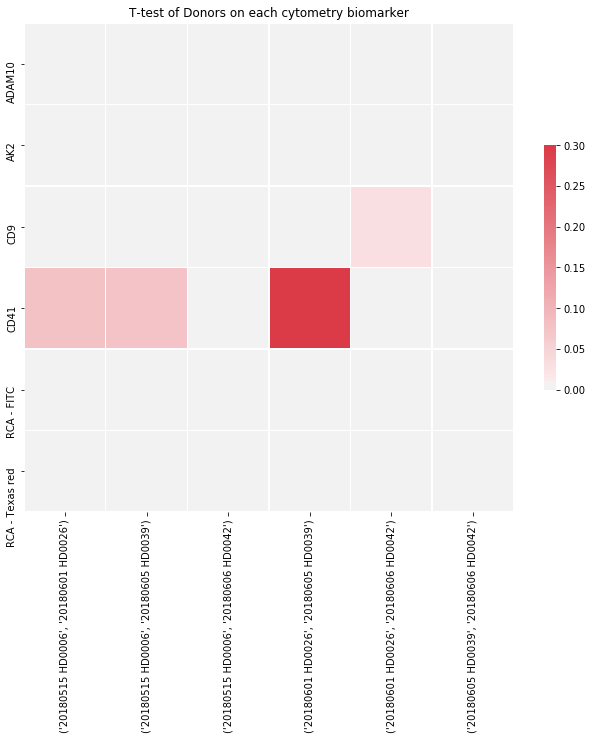

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('T-test of Donors on each cytometry biomarker')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
donors = []
files = set()
count = 0

for donor in os.listdir(root_path):
    donors.append(donor)
    
    donor_path = f'{root_path}\\{donor}\\new data'
    
    for file in os.listdir(donor_path):
        if fnmatch.fnmatch(file, '*.csv'):
            files.add(file)
            count += 1
            
print(count)
print(len(files))
print(files)

48
12
{'export_PRP_Dy594 RCA1.csv', 'export_PRP_AF488 1G5 + APC ADAM10.csv', 'export_PRP_AF488 IgG.csv', 'export_PRP_PE IgG1.csv', 'export_PRP_FITC AK2.csv', 'export_PRP_APC IgG2b.csv', 'export_PRP_FITC RCA1.csv', 'export_PRP_PE CD9.csv', 'export_PRP_Unstained.csv', 'export_PRP_FITC IgG1.csv', 'export_PRP_PE CD41.csv', 'export_PRP_PE IgG.csv'}


In [ ]:
donors_matches = []

for donor in os.listdir(root_path):
    donors.append(donor)
    
    donor_matches = []
    
    donor_path = f'{root_path}\\{donor}\\new data'
    
    for file in files:
        donor_matches.append(file in os.listdir(donor_path))
    
    donors_matches.append(donor_matches)

donor_measures = pd.DataFrame.from_records(donors_matches, columns=files)          

In [ ]:
donor_measures

In [ ]:
biomarkers = pd.read_csv(path, header=225)

In [ ]:
biomarkers.head()

In [ ]:
biomarkers.shape